In [13]:
import pandas as pd
# URL del archivo CSV en git o un contenedor
url = 'https://raw.githubusercontent.com/JossueGG/tec_bigdata_equipo17/main/ratings_small.csv?token=GHSAT0AAAAAACSM657QSABERQLALAT2I7V2ZSGXR7A'
# Cargar los datos desde la URL
df = pd.read_csv(url)
df

,userId,movieId,rating,timestamp,title
0,1,2294,2.0,1260759108,Antz
1,1,1405,1.0,1260759203,Beavis and Butt-Head Do America
2,1,1287,2.0,1260759187,Ben-Hur
3,1,3671,3.0,1260759117,Blazing Saddles
4,1,1343,2.0,1260759131,Cape Fear
...,...,...,...,...,...
99999,671,4034,4.5,1064245493,Traffic
100000,671,1266,4.0,1065149270,Unforgiven
100001,671,2359,4.0,1063503933,Waking Ned
100002,671,3253,3.0,1063503940,Wayne's World


In [14]:
df.info()
#Se puede observar que 4 columnas son numericas (1 float y 3 int) y 1 son cualitativas (Object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
 4   title      100004 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 3.8+ MB


In [15]:
percent_missing = df.isna().sum() * 100 / len(df)

df2 = pd.DataFrame({
    'nombre_columna': df.columns,
    'porcentaje_nulo': percent_missing
})
df2
#No se encuentran nulos en ninguna columna

,nombre_columna,porcentaje_nulo
userId,userId,0.0
movieId,movieId,0.0
rating,rating,0.0
timestamp,timestamp,0.0
title,title,0.0


In [35]:
df.describe()
#Se observa que la variable tanto userid y movieid son identificadores
#La variable timestamp es una variable de fecha y hora.
#La variable rating es finalmente la que varia de 0.5 a 5


,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [37]:
print('Cantidad de usuarios: ',df['userId'].nunique())


Cantidad de usuarios:  671


-0.6676201700428638


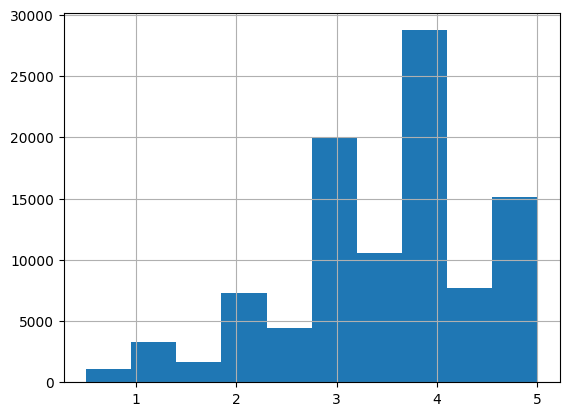

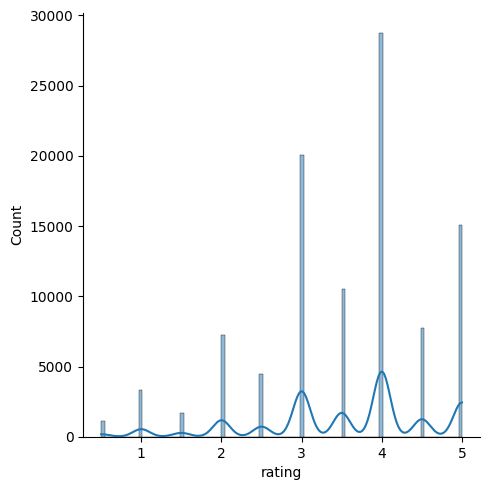

In [17]:
#Se muestra el calculo de simetria y al ser negativo corresponde al histrograma con mayor peso a la derecha (positive skew)
import seaborn as sns
print(df['rating'].skew(numeric_only=True))
df['rating'].hist()
sns.displot(df['rating'], kde=True)

<Axes: xlabel='rating'>

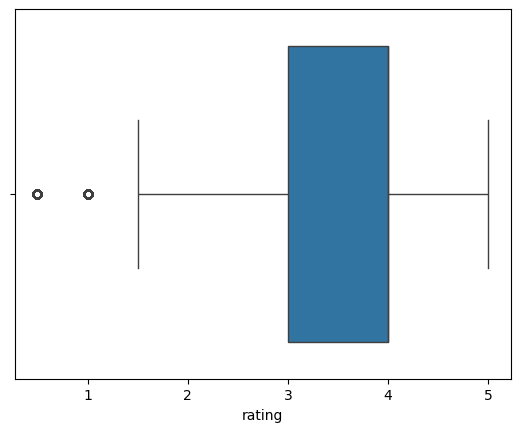

In [23]:
sns.boxplot(x=df['rating'])
#podemos observar la distribución de la variable a través de sus cuartiles e identificar que tenemos valores outliers en 1 y 0.5

In [29]:
df.describe(include = 'object')
#Podemos observar que en la variables categóricas, en un total de 100,004 registros tenemos 8.739 peliculas, siendo la más frecuente Forrest Gump con 341.

,title
count,100004
unique,8739
top,Forrest Gump
freq,341


In [30]:
df['title'].value_counts()

title
Forrest Gump                341
Pulp Fiction                324
The Shawshank Redemption    311
The Silence of the Lambs    304
Star Wars                   291
                           ... 
Murphy's War                  1
National Velvet               1
Nevada Smith                  1
On Moonlight Bay              1
The Sixth Man                 1
Name: count, Length: 8739, dtype: int64

In [38]:
df['userId'].value_counts()

userId
547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: count, Length: 671, dtype: int64